In [20]:
import urllib
import requests
import webbrowser
import datetime
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, ImageColorGenerator

from bs4 import BeautifulSoup

In [ ]:
# nltk.download()

In [2]:
sia = SentimentIntensityAnalyzer()

In [4]:
text = 'the-hive-bar-and-bistro-garfield'
text2 = 'the-hive-bar-and-bistro-garfield?start=20'
text = urllib.parse.quote_plus(text)
print(text)

the-hive-bar-and-bistro-garfield


In [92]:
page = 'https://www.yelp.com/biz/' + text
print(page)

page = 'https://www.yelp.com/biz/' + text + '?start=' + str(20)
print(page)

https://www.yelp.com/biz/the-hive-bar-and-bistro-garfield
https://www.yelp.com/biz/the-hive-bar-and-bistro-garfield?start=20


In [94]:
response = requests.get(page)
soup = BeautifulSoup(response.text, 'html.parser')
print(soup)

<!DOCTYPE HTML>

<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!--> <html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml"> <!--<![endif]-->
<head>
<script>
            (function() {
                var main = null;

                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(j&&!h){document.body.inne

In [51]:
reviews = ""
for i in soup.find_all(itemprop= 'description'):
    reviews += i.text
print(reviews)

I love this gem from Garfield! 

From the atmosphere, tasty food and great service, I enjoyed coming here with a group of friends! 

I heard a lot of things about this place and i finally came to check myself, the bar is spacious and has an outside patio.

I had their Lemon pepper wings with sweet potato fries and they were tasty and delicious! 

If you are in the area, check this location and their popular wings.
Last Tuesday I dined in for Taco Tuesday during Happy Hour with some of my coworkers. One of my coworkers is a regular there and they all had attended for her birthday a few weeks prior. I'm glad I was able to finally try the restaurant.

I started with a Vodka Sprite and was a little disappointed that they're a Tito's Vodka establishment. I'm joking of course but, I can't understand why people like Tito's. It tastes like straight acetone. I opted for any other vodka but, Tito's. The drink was tasty but, I think I make a better mix of the two. I started with shrimp tacos. If 

In [50]:
for i in soup.find_all(itemprop= 'description'):
    print(i.text)

I love this gem from Garfield! 

From the atmosphere, tasty food and great service, I enjoyed coming here with a group of friends! 

I heard a lot of things about this place and i finally came to check myself, the bar is spacious and has an outside patio.

I had their Lemon pepper wings with sweet potato fries and they were tasty and delicious! 

If you are in the area, check this location and their popular wings.

Last Tuesday I dined in for Taco Tuesday during Happy Hour with some of my coworkers. One of my coworkers is a regular there and they all had attended for her birthday a few weeks prior. I'm glad I was able to finally try the restaurant.

I started with a Vodka Sprite and was a little disappointed that they're a Tito's Vodka establishment. I'm joking of course but, I can't understand why people like Tito's. It tastes like straight acetone. I opted for any other vodka but, Tito's. The drink was tasty but, I think I make a better mix of the two. I started with shrimp tacos. If

In [106]:
sentiment_score = sia.polarity_scores(reviews)
print(sentiment_score)

{'neg': 0.026, 'neu': 0.663, 'pos': 0.311, 'compound': 1.0}


In [100]:
page_num = soup.find_all(class_= "available-number pagination-links_anchor")
# print(page_num)
# print(len(page_num))

counter = 0
reviews = ""
page = 'https://www.yelp.com/biz/' + text
response = requests.get(page)
soup = BeautifulSoup(response.text, 'html.parser')

for i in range (len(page_num) + 1):
    response = requests.get(page)
    soup = BeautifulSoup(response.text, 'html.parser')
    for i in soup.find_all(itemprop= 'description'):
        reviews += i.text
    counter += 20
    page = 'https://www.yelp.com/biz/' + text + '?start=' + str(counter)

In [101]:
print(reviews)

I love this gem from Garfield! 

From the atmosphere, tasty food and great service, I enjoyed coming here with a group of friends! 

I heard a lot of things about this place and i finally came to check myself, the bar is spacious and has an outside patio.

I had their Lemon pepper wings with sweet potato fries and they were tasty and delicious! 

If you are in the area, check this location and their popular wings.
Last Tuesday I dined in for Taco Tuesday during Happy Hour with some of my coworkers. One of my coworkers is a regular there and they all had attended for her birthday a few weeks prior. I'm glad I was able to finally try the restaurant.

I started with a Vodka Sprite and was a little disappointed that they're a Tito's Vodka establishment. I'm joking of course but, I can't understand why people like Tito's. It tastes like straight acetone. I opted for any other vodka but, Tito's. The drink was tasty but, I think I make a better mix of the two. I started with shrimp tacos. If 

In [7]:
file = "D:/David/Data/Yelp/hive_manual.txt"
f = open(file, 'rt')
txt = f.read()
f.close()

In [8]:
file = "D:/David/Data/Sentiment/StopWords_GenericLong.txt"
f = open(file, encoding = 'utf-8-sig')
s_words = f.read()
f.close()

In [14]:
stop_words = set(stopwords.words('english'))

In [102]:
words = reviews.split()
words = [word.upper() for word in words]
stopwords = s_words.split()
stopwords = [stopwords.upper() for stopwords in stopwords]
ns_words = [w for w in words if w not in stopwords]
ans_words = []

for w in ns_words:
    if not w.isalpha():
        continue
    ans_words.append(w)
    
f_dist = nltk.FreqDist(ans_words)
print(f_dist)
print(f_dist.most_common(50))

<FreqDist with 1041 samples and 2962 outcomes>
[('GREAT', 83), ('PLACE', 78), ('FOOD', 77), ('BAR', 55), ('GOOD', 48), ('DRINKS', 45), ('NICE', 32), ('BACK', 29), ('STAFF', 29), ('WINGS', 25), ('AMAZING', 24), ('HAPPY', 23), ('NIGHT', 23), ('SERVICE', 22), ('HIVE', 21), ('ORDERED', 20), ('LOVE', 19), ('TIME', 19), ('FRIENDLY', 18), ('RECOMMEND', 18), ('HOUR', 16), ('TACOS', 16), ('FEEL', 16), ('MUSIC', 16), ('AWESOME', 16), ('MAKE', 15), ('MADE', 15), ('CHEF', 15), ('COOL', 15), ('SHRIMP', 14), ('COMING', 13), ('DELICIOUS', 13), ('SPECIALS', 13), ('MENU', 13), ('SELECTION', 13), ('LOCAL', 13), ('DRINK', 12), ('FRIENDS', 12), ('PEOPLE', 11), ('FRESH', 11), ('SPOT', 11), ('WAITRESS', 11), ('SUPER', 11), ('FAVORITE', 10), ('FRIEND', 10), ('GIVE', 10), ('PARKING', 10), ('ATMOSPHERE', 10), ('FILET', 10), ('SMALL', 10)]


In [107]:
mask = np.array(Image.open("D:/David/Downloads/hive-animate.png"))

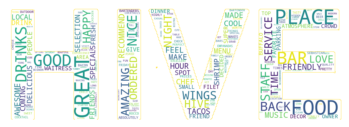

In [108]:
wordcloud = WordCloud(background_color="white",
                      mask = mask,
                      width = 1200,
                      height = 1700,
                      contour_width = .2, 
                      contour_color ='gold',
                      max_words = 200, ).generate_from_frequencies(f_dist)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [109]:
wordcloud.to_file("D:/David/Pictures/hive.jpg")